In [253]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import mean_squared_error  # MSE RMSE
from sklearn.metrics import mean_absolute_error # mae

In [254]:
df1 = pd.read_csv('data/train_메뉴제외.csv')
df2 = pd.read_csv('data/train저녁메뉴더미화.csv')
df3 = pd.read_csv('data/메뉴구분.csv')

<AxesSubplot:>

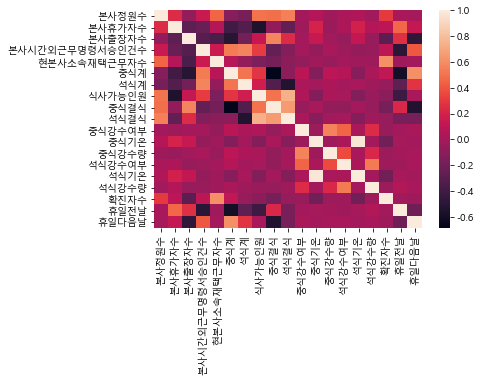

In [255]:
sns.heatmap(df1.corr())

## 이 위로 데이터 시각화 할것

### 스케일링

In [256]:
# 일자 드랍하고 y값 2개 뺴고 전부다 스케일링 해버리자
df1['요일'] =  df1['요일'].astype('category') #요일을 카테고리화 하였다
df1['요일'] = df1.요일.cat.codes #요일을 숫자로 바꿈

y = df1[['중식계', '석식계','일자','중식강수여부','석식강수여부','휴일전날', '휴일다음날']]

x = df1.drop(columns=['중식계', '석식계','일자','중식강수여부','석식강수여부','휴일전날', '휴일다음날']) # 카테고리컬 변수와 y값으로 쓸 변수 일자변수 빼고 전부 스케일링
x = StandardScaler().fit_transform(x)

In [257]:
df1.drop(columns=['중식계', '석식계','일자','중식강수여부','석식강수여부','휴일전날', '휴일다음날']).columns

Index(['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수',
       '식사가능인원', '중식결식', '석식결식', '중식기온', '중식강수량', '석식기온', '석식강수량', '확진자수'],
      dtype='object')

In [258]:
x = pd.DataFrame(x,columns=df1.drop(columns=['중식계', '석식계','일자','중식강수여부','석식강수여부','휴일전날', '휴일다음날']).columns)
df1 =pd.concat([x,y],axis=1)

In [259]:
df1.head(2)

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,식사가능인원,중식결식,석식결식,중식기온,...,석식기온,석식강수량,확진자수,중식계,석식계,일자,중식강수여부,석식강수여부,휴일전날,휴일다음날
0,0.711514,-1.208083,-0.748721,-2.094550,-0.146735,-0.395901,0.202544,-0.486811,0.812158,-1.594185,...,-1.699101,-0.149484,-0.283476,1039.0,331.0,2016-02-01,0.0,0.0,0,1
1,1.418335,-1.208083,-0.748721,-1.565987,0.182349,-0.395901,0.072225,0.155553,-0.416910,-1.736090,...,-1.535727,-0.149484,-0.283476,867.0,560.0,2016-02-02,0.0,0.0,0,0


### 점심데이터 카테고리데이터 합치기

In [260]:
df_lunch_cat = df3.iloc[:1205]

In [261]:
df_lunch_cat.head(2)

,일자,밥,국,메인,반찬,구분,국분류,메뉴분류
0,2016-02-01,밥,오징어찌개,쇠불고기,계란찜,중식,찜,육류
1,2016-02-02,밥,김치찌개,가자미튀김,모둠소세지구이,중식,찌개,해산물


In [262]:
df_lunch_cat_dummy =pd.get_dummies(df_lunch_cat.iloc[:1205][['국분류', '메뉴분류']]) # 더미화
df_lunch_cat = pd.concat([df1,df_lunch_cat_dummy],axis=1)

df_lunch_cat['요일'] =  df_lunch_cat['요일'].astype('category') #요일을 카테고리화 하였다
df_lunch_cat['요일'] = df_lunch_cat.요일.cat.codes #요일을 숫자로 바꿈

df_lunch_cat.columns

Index(['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수',
       '식사가능인원', '중식결식', '석식결식', '중식기온', '중식강수량', '석식기온', '석식강수량', '확진자수',
       '중식계', '석식계', '일자', '중식강수여부', '석식강수여부', '휴일전날', '휴일다음날', '국분류_국',
       '국분류_국수', '국분류_스프', '국분류_우동', '국분류_찌개', '국분류_찜', '국분류_탕', '메뉴분류_기타',
       '메뉴분류_육류', '메뉴분류_조류', '메뉴분류_해산물'],
      dtype='object')

In [263]:
df_lunch_cat.head(2)

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,식사가능인원,중식결식,석식결식,중식기온,...,국분류_국수,국분류_스프,국분류_우동,국분류_찌개,국분류_찜,국분류_탕,메뉴분류_기타,메뉴분류_육류,메뉴분류_조류,메뉴분류_해산물
0,3,-1.208083,-0.748721,-2.094550,-0.146735,-0.395901,0.202544,-0.486811,0.812158,-1.594185,...,0,0,0,0,1,0,0,1,0,0
1,4,-1.208083,-0.748721,-1.565987,0.182349,-0.395901,0.072225,0.155553,-0.416910,-1.736090,...,0,0,0,1,0,0,0,0,0,1


### 점심데이터 메뉴 전체 더미 데이터 합침

In [264]:
df_lunch_dummy = pd.read_csv('data/train점심메뉴더미화.csv')
df_lunch = pd.concat([df1,df_lunch_dummy],axis=1) #저녁 합침

df_lunch['요일'] =  df_lunch['요일'].astype('category')
df_lunch['요일'] = df_lunch.요일.cat.codes

In [265]:
df_lunch.tail(2)

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,식사가능인원,중식결식,석식결식,중식기온,...,후르츠탕수육,훈제오리,훈제오리고추장볶음,훈제오리구이,훈제오리냉채,훈제오리단호박볶음,훈제오리마늘볶음,훈제오리볶음,흑임자연근샐러드,히레카츠
1203,3,1.023312,-0.353247,-2.025607,1.388992,2.579754,0.174213,-0.96535,-0.046239,-0.688175,...,0,0,0,0,0,0,0,0,0,0
1204,4,1.023312,-0.616896,-1.336178,1.124912,2.898249,0.021230,-0.52130,-0.070625,-1.244880,...,0,0,0,0,0,0,0,0,0,0


## 저녁 합침

### 저녁 전체 메뉴 합침

In [266]:
df_dinner = pd.concat([df1,df2],axis=1) #저녁 합침
df_dinner['요일'] =  df_dinner['요일'].astype('category')
df_dinner['요일'] = df_dinner.요일.cat.codes

### 저녁 카데코리화 메뉴 합침

In [267]:
df_dinner_cat_dummy =pd.get_dummies(df3.iloc[1205:][['국분류', '메뉴분류']]) # 더미화
df_dinner_cat_dummy
pd.concat([df1,df_lunch_dummy],axis=1) #저녁 합침
df_dinner_cat_duumy = pd.concat([df3.iloc[1205:]['일자'],df_dinner_cat_dummy],axis=1) # 저녁값이 비어있는곳이 있어 merge 하기 위해 일자 값 추가

df_dinner_cat =pd.merge(df1, df_dinner_cat_duumy,on='일자',how='left')

df_dinner_cat['요일'] =  df_dinner_cat['요일'].astype('category')
df_dinner_cat['요일'] = df_dinner_cat.요일.cat.codes

In [268]:
df_dinner_cat.isna().sum().sum() #저녁데이터가 없는경우는 뺀다

528

In [269]:
df_dinner_cat.dropna(inplace=True)

In [270]:
df_dinner_cat.isna().sum().sum() #저녁데이터가 없는경우는 뺀

0

- df_lunch
- df_lunch_cat
- df_dinner
- df_dinner_cat

## 데이터 나누고 훈련

## 라쏘

### 중식

In [271]:
#df_lunch
#df_lunch_cat

In [272]:
X = df_lunch.drop(columns=['일자','중식계','석식계','석식결식','중식결식'])
#X = df_lunch[['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수',
#       '식사가능인원', '중식강수여부', '중식기온', '중식강수량', '석식강수여부', '석식기온', '석식강수량', '확진자수',
#       '휴일전날', '휴일다음날']]
X2 = df_lunch_cat.drop(columns=['일자','중식계','석식계','석식결식','중식결식'])
#X = df[['요일','본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','식사가능인원']] #0.43
y = y2 = df_lunch['중식계']

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [274]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

0.738052336317268
RMSE= 11324.60375420931
MAE= 84.03137118622696


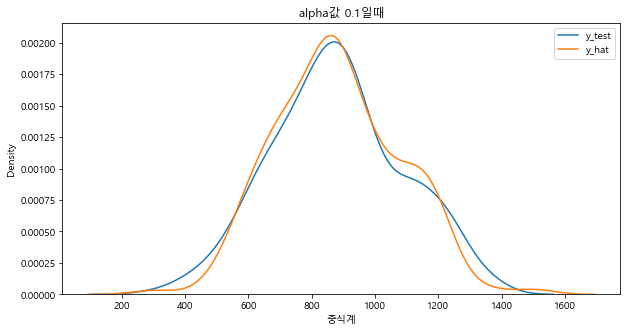

0.8004837720495185
RMSE= 8625.548295824137
MAE= 71.17805925308902


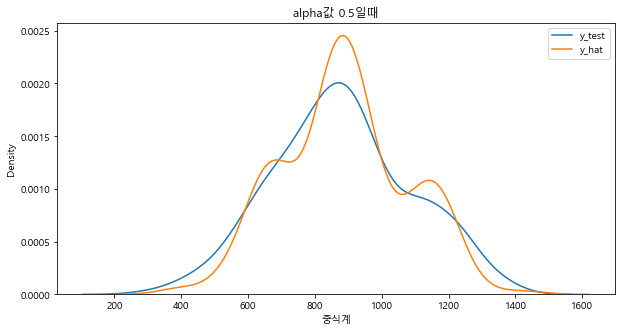

0.8028598524124219
RMSE= 8522.824842521535
MAE= 70.37171422155583


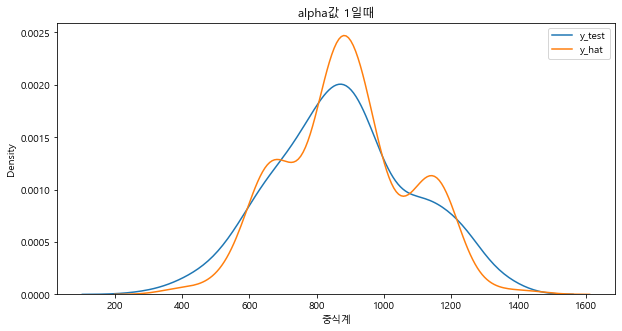

0.7482766319627672
RMSE= 10882.583790284743
MAE= 79.89382615945144


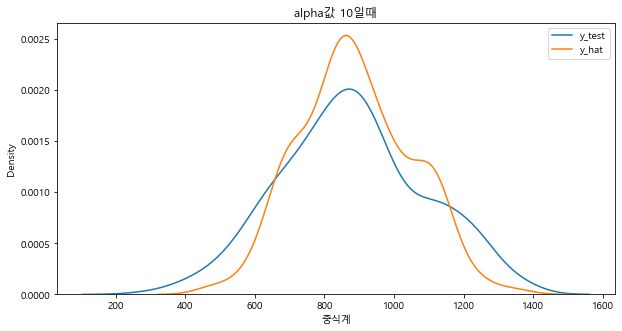

0.22956635029655692
RMSE= 33307.629772824526
MAE= 143.97802908048288


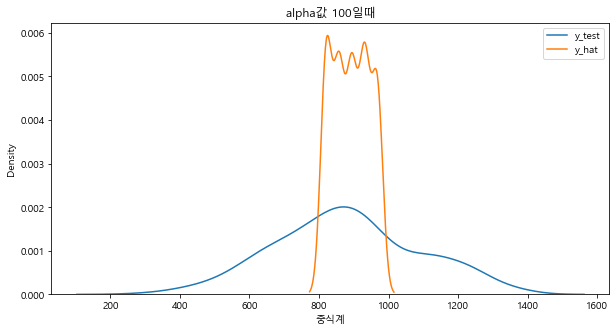

In [275]:
from sklearn.linear_model import Lasso #전체더미화
for alpha in [0.1, 0.5, 1, 10, 100]:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X_train, y_train)
    print(model_lasso.score(X_test, y_test)) #R2값 1일수록 좋은것
    pre =model_lasso.predict(X_test)
    
    print('RMSE=',mean_squared_error(y_test, pre))
    print('MAE=',mean_absolute_error(y_test, pre))

    
    plt.figure(figsize=(10,5))
    sns.kdeplot(y_test, label='y_test')
    sns.kdeplot(pre, label='y_hat')
    
    
    plt.title(f'alpha값 {alpha}일때')
    plt.legend()
    plt.show()


0.8037944346620391
RMSE= 8482.944751381216
MAE= 69.62983425414365


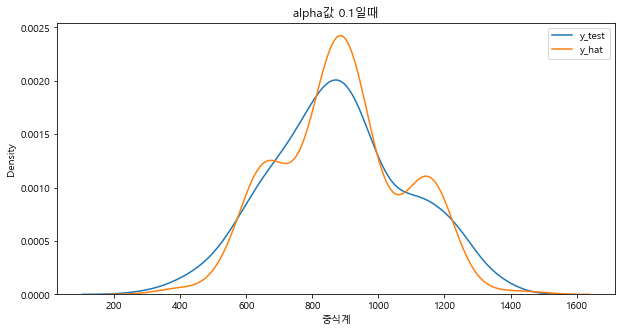

0.803115284729133
RMSE= 8510.610497237569
MAE= 69.87569060773481


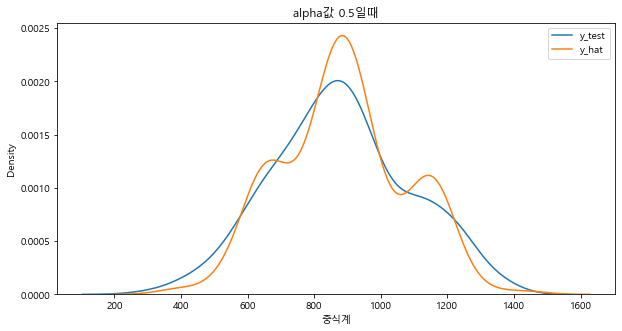

0.8023691578499363
RMSE= 8544.472375690608
MAE= 70.15745856353591


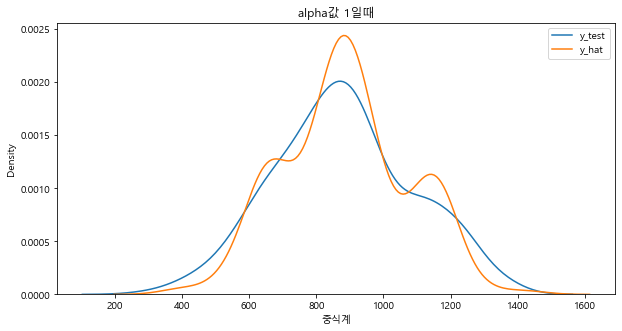

0.7482766319627672
RMSE= 10880.063535911602
MAE= 79.88674033149171


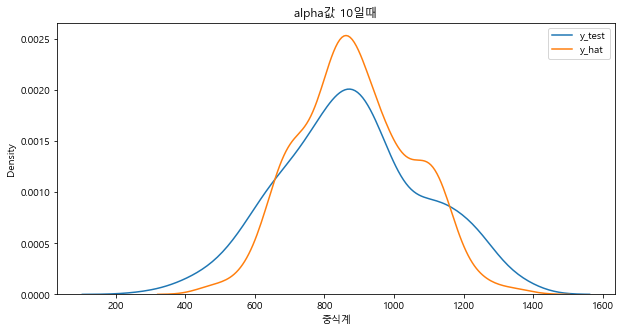

0.22956635029655692
RMSE= 33275.367403314915
MAE= 143.88674033149172


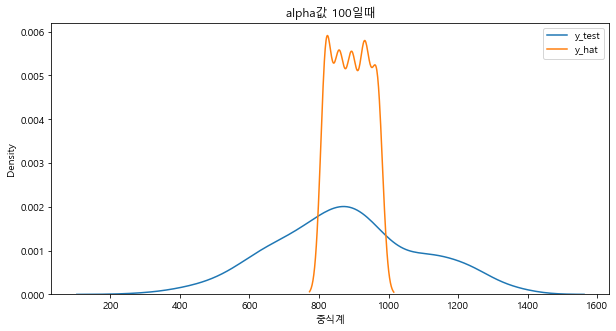

In [276]:
for alpha in [0.1, 0.5, 1, 10, 100]:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X2_train, y2_train)
    print(model_lasso.score(X2_test, y2_test))
    pre =model_lasso.predict(X2_test)
    pre =np.round(pre,0)

    print('RMSE=',mean_squared_error(y2_test, pre))
    print('MAE=',mean_absolute_error(y2_test, pre))

    plt.figure(figsize=(10,5))
    ax1 = sns.kdeplot(y_test, label='y_test')
    ax2 = sns.kdeplot(pre, label='y_hat', ax=ax1)
    plt.title(f'alpha값 {alpha}일때')
    plt.legend()
    plt.show()

### 석식
- df_dinner
- df_dinner_cat

In [277]:
df_dinner.columns

Index(['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수',
       '식사가능인원', '중식결식', '석식결식', '중식기온',
       ...
       '훈제오리', '훈제오리구이', '훈제오리냉채', '훈제오리떡볶음', '훈제오리볶음', '훈제오리불고기', '흑임자곤약샐러드',
       '흑임자드레싱', '흑임자샐러드', '흑임자시금치샐러드'],
      dtype='object', length=1437)

In [278]:
X3 = df_dinner.drop(columns=['일자','중식계','석식계','석식결식','중식결식'])
X4 = df_dinner_cat.drop(columns=['일자','중식계','석식계','석식결식','중식결식'])
#X = df[['요일','본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수','식사가능인원']] #0.43
y3 = df_dinner['중식계']
y4 = df_dinner_cat['석식계']

In [279]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=1)
from sklearn.model_selection import train_test_split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=1)

0.7747869693323671
RMSE= 9735.914364640885
MAE= 76.63812154696133


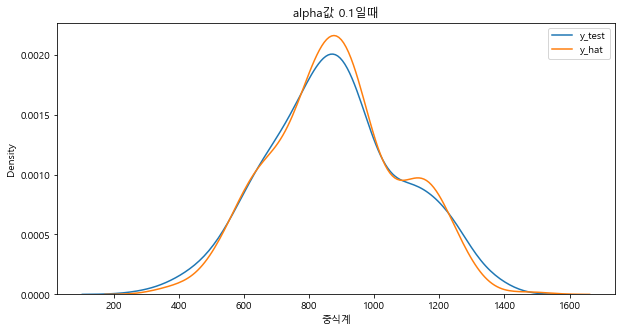

0.8025941834388562
RMSE= 8532.845303867403
MAE= 70.33701657458563


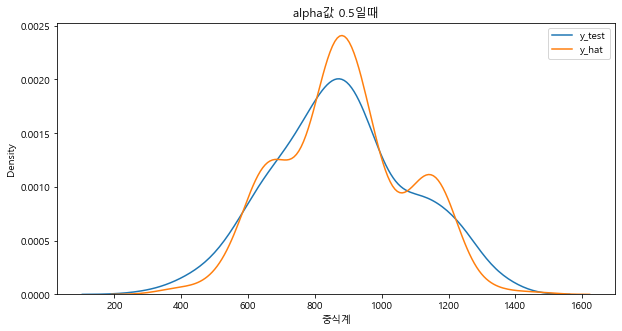

0.8024073399681935
RMSE= 8544.740331491712
MAE= 70.3646408839779


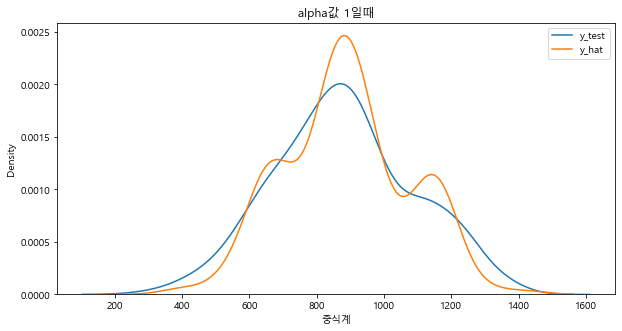

0.7482766319627672
RMSE= 10880.063535911602
MAE= 79.88674033149171


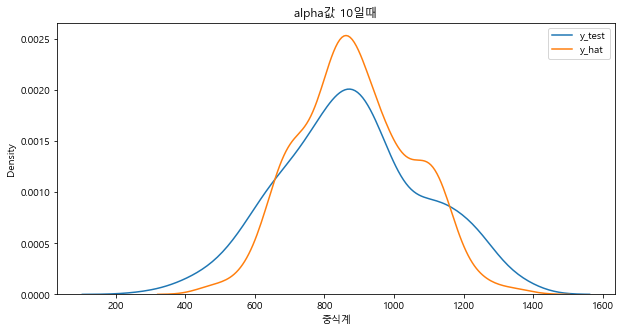

0.22956635029655692
RMSE= 33275.367403314915
MAE= 143.88674033149172


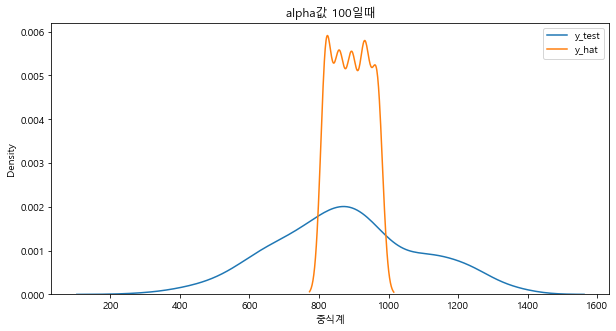

In [280]:
for alpha in [0.1, 0.5, 1, 10, 100]:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X3_train, y3_train)
    print(model_lasso.score(X3_test, y3_test))
    pre =model_lasso.predict(X3_test)
    pre =np.round(pre,0)

    print('RMSE=',mean_squared_error(y3_test, pre))
    print('MAE=',mean_absolute_error(y3_test, pre))

    plt.figure(figsize=(10,5))
    ax1 = sns.kdeplot(y3_test, label='y_test')
    ax2 = sns.kdeplot(pre, label='y_hat', ax=ax1)
    plt.title(f'alpha값 {alpha}일때')
    plt.legend()
    plt.show()

0.545408019854692
RMSE= 5327.200573065903
MAE= 54.684813753581665


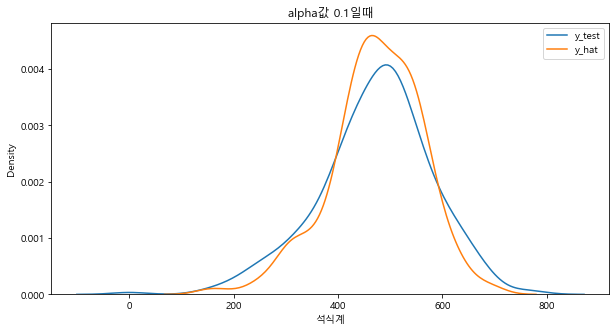

0.5502044811309639
RMSE= 5269.338108882522
MAE= 54.34097421203438


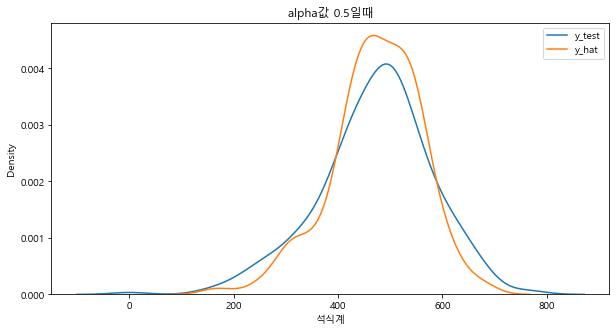

0.5498069128997016
RMSE= 5275.833810888252
MAE= 54.51575931232092


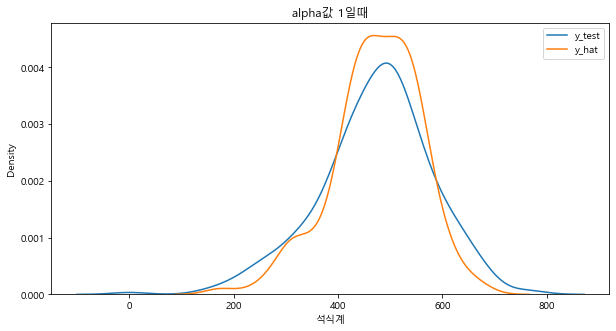

0.49131616843430337
RMSE= 5960.263610315186
MAE= 59.11174785100287


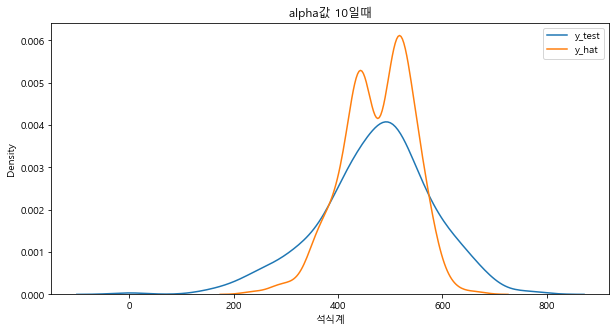

-0.007465494955759988
RMSE= 11815.836676217765
MAE= 82.5243553008596


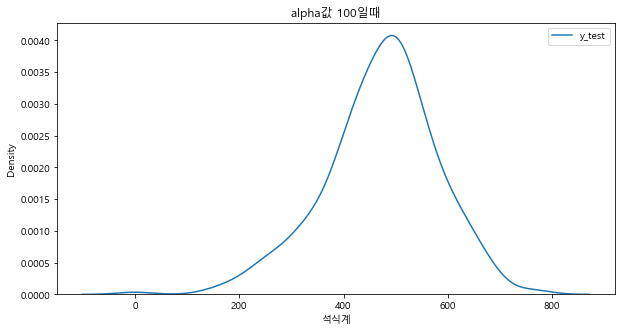

In [281]:
for alpha in [0.1, 0.5, 1, 10, 100]:
    model_lasso = Lasso(alpha=alpha)
    model_lasso.fit(X4_train, y4_train)
    print(model_lasso.score(X4_test, y4_test))
    pre =model_lasso.predict(X4_test)
    pre =np.round(pre,0)

    print('RMSE=',mean_squared_error(y4_test, pre))
    print('MAE=',mean_absolute_error(y4_test, pre))

    plt.figure(figsize=(10,5))
    ax1 = sns.kdeplot(y4_test, label='y_test')
    ax2 = sns.kdeplot(pre, label='y_hat', ax=ax1)
    plt.title(f'alpha값 {alpha}일때')
    plt.legend()
    plt.show()


## SVM
- gamma는 가우시안 커널의 폭을 조절하는것

In [282]:
from sklearn import svm
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

RMSE= 15372.828729281768
MAE= 95.74033149171271


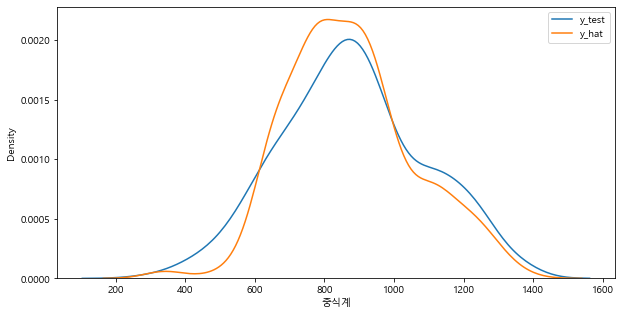

In [283]:

clf = svm.SVC(kernel = 'linear') #다른파라메터 넣어봐도 큰 변화 없음 gamma 등
clf.fit(X_train,y_train)
pre_clf =clf.predict(X_test)

print('RMSE=',mean_squared_error(y_test, pre_clf))
print('MAE=',mean_absolute_error(y_test, pre_clf))

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(pre_clf, label='y_hat', ax=ax1)
plt.legend()
plt.show()

RMSE= 17709.505524861877
MAE= 100.63812154696133


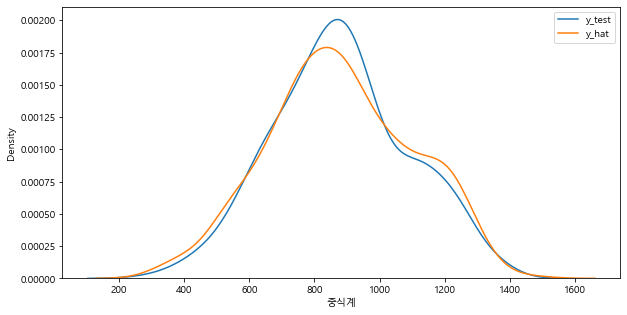

In [284]:
clf = svm.SVC(kernel = 'linear', max_iter=-1)
clf.fit(X2_train,y2_train)
pre_clf =clf.predict(X2_test)

print('RMSE=',mean_squared_error(y2_test, pre_clf))
print('MAE=',mean_absolute_error(y2_test, pre_clf))

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y2_test, label='y_test')
ax2 = sns.kdeplot(pre_clf, label='y_hat', ax=ax1)
plt.legend()
plt.show()

RMSE= 15026.082872928177
MAE= 95.54696132596685


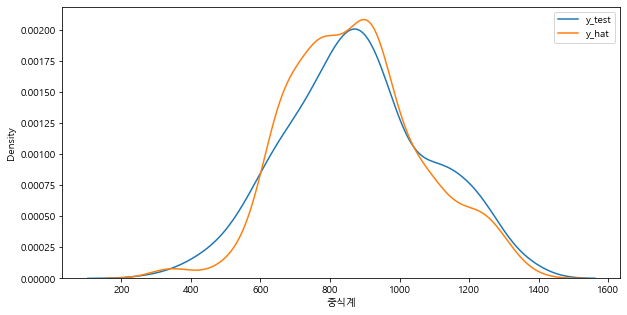

In [285]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X3_train,y3_train)
pre_clf =clf.predict(X3_test)

print('RMSE=',mean_squared_error(y3_test, pre_clf))
print('MAE=',mean_absolute_error(y3_test, pre_clf))

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y3_test, label='y_test')
ax2 = sns.kdeplot(pre_clf, label='y_hat', ax=ax1)
plt.legend()
plt.show()

RMSE= 8652.767908309455
MAE= 71.01432664756447


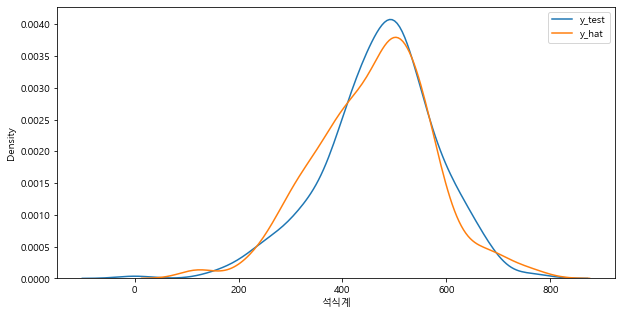

In [286]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X4_train,y4_train)
pre_clf =clf.predict(X4_test)

print('RMSE=',mean_squared_error(y4_test, pre_clf))
print('MAE=',mean_absolute_error(y4_test, pre_clf))


plt.figure(figsize=(10,5))

ax1 = sns.kdeplot(y4_test, label='y_test')
ax2 = sns.kdeplot(pre_clf, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [287]:
from statsmodels.formula.api import ols

res = ols('중식계~본사정원수+요일',data=df_lunch).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    중식계   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     334.2
Date:                Fri, 01 Oct 2021   Prob (F-statistic):          3.81e-116
Time:                        00:27:22   Log-Likelihood:                -7883.3
No. Observations:                1205   AIC:                         1.577e+04
Df Residuals:                    1202   BIC:                         1.579e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    717.2663      8.366     85.734      0.000     700.852     733.680
본사정원수        -24.9084      4.842     -5.144      0.000     -34.409     -15.408
요일            86.8223      3.423     25.367      0.000      80.107      93.537
==============================================================================
Omnibus:                        4.954   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                5.890
Skew:                           0.035   Prob(JB):                       0.0526
Kurtosis:                       3.335   Cond. No.                         4.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
'''from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import time
from tqdm import tqdm

# 랜덤 포레스트의 parameter 범위를 정의한다.
RF_params = {
    'n_estimators': [50,150,500,1000],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [1,2,3,5,6,10],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 3, 5, 10]}

# GridSearchCV를 이용하여 Randomforest 모델 생성
RF_model = GridSearchCV(RandomForestRegressor(random_state=2021), param_grid=RF_params, n_jobs=-1).fit(X_train, y_train).best_estimator_

# 테스트 데이터셋 예측
RF_predict = RF_model.predict(X_test)


print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(RF_predict,y_test))}')
'''

"from sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import mean_squared_error\nimport time\nfrom tqdm import tqdm\n\n# 랜덤 포레스트의 parameter 범위를 정의한다.\nRF_params = {\n    'n_estimators': [50,150,500,1000],\n    'max_features': ['auto', 'sqrt'],\n    'max_depth' : [1,2,3,5,6,10],\n    'min_samples_leaf': [1, 2, 4],\n    'min_samples_split': [2, 3, 5, 10]}\n\n# GridSearchCV를 이용하여 Randomforest 모델 생성\nRF_model = GridSearchCV(RandomForestRegressor(random_state=2021), param_grid=RF_params, n_jobs=-1).fit(X_train, y_train).best_estimator_\n\n# 테스트 데이터셋 예측\nRF_predict = RF_model.predict(X_test)\n\n\nprint(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(RF_predict,y_test))}')\n"